# goodinfo
https://goodinfo.tw/tw/ShowBuySaleChart.asp?STOCK_ID=2330&CHT_CAT=DATE

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

url ='https://goodinfo.tw/tw/ShowBuySaleChart.asp'
payload = {
    'STOCK_ID': '2330',
    'CHT_CAT': 'DATE',
    'PRICE_ADJ': 'F',
    'SHEET': '三大法人買賣張數',
    'STEP': 'DATA',
    'PERIOD': 180    
}

payload['STOCK_ID'] = '2330' #由這邊換商品
payload['PERIOD'] = 180 #3個月90, 6個月180, 1年365

headers = {
    'Referer':'https://goodinfo.tw/tw/ShowBuySaleChart.asp?STOCK_ID=2330&CHT_CAT=DATE',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

res = requests.post(url, data = payload, headers = headers)
res

<Response [200]>

In [8]:
res.encoding = 'utf8'
soup = bs(res.text, 'lxml')
tb = soup.select('table')[2]
tb

<table class="b1 p4_1 r0_10 row_bg_2n row_mouse_over" style="width:100%;font-size:10pt;line-height:17px;"><tr class="bg_h2" style="font-weight:bold;text-align:center;"> <th rowspan="2" width="1%"><nobr>期別</nobr></th> <th rowspan="2" width="1%"><nobr>成交</nobr></th> <th rowspan="2" width="1%"><nobr>漲跌</nobr></th> <th rowspan="2" width="1%"><nobr>漲跌</nobr><br/><nobr style="font-size:9pt">(%)</nobr></th> <th rowspan="2" width="1%"><nobr>成交量</nobr><br/><nobr style="font-size:9pt">(張)</nobr></th><th colspan="5"><nobr>外資</nobr></th><th colspan="3"><nobr>投信</nobr></th><th colspan="3"><nobr>自營商</nobr></th><th colspan="3"><nobr>三大法人合計</nobr></th></tr><tr class="bg_h2" style="font-weight:bold;text-align:center;"><th width="1%"><nobr>買進</nobr><br/><nobr style="font-size:9pt">(張)</nobr></th><th width="1%"><nobr>賣出</nobr><br/><nobr style="font-size:9pt">(張)</nobr></th><th width="1%"><nobr>買賣超</nobr><br/><nobr style="font-size:9pt">(張)</nobr></th><th width="1%"><nobr>持有</nobr><br/><nobr style="font-s

In [17]:
len(soup.select('.bg_h2'))

14

In [18]:
for th in soup.select('.bg_h2'):
    th.decompose() #刪除.bg_h2表頭

In [19]:
len(soup.select('.bg_h2')) #刪除後len: 23 -> 0

0

In [20]:
tb = soup.select('table')[2]
tb

<table class="b1 p4_1 r0_10 row_bg_2n row_mouse_over" style="width:100%;font-size:10pt;line-height:17px;"><tr align="center"> <td>12/08</td> <td style="color:red"><nobr>570</nobr></td> <td style="color:red"><nobr>+4</nobr></td> <td style="color:red"><nobr>+0.71</nobr></td> <td>39,244</td><td>29,357</td><td>21,450</td><td style="color:red">+7,907</td><td>18,803,615</td><td>72.5</td><td>131</td><td>957</td><td style="color:green">-826</td><td>429</td><td>1,325</td><td style="color:green">-896</td><td>29,917</td><td>23,732</td><td style="color:red">+6,185</td></tr><tr align="center"> <td>12/07</td> <td style="color:green"><nobr>566</nobr></td> <td style="color:green"><nobr>-4</nobr></td> <td style="color:green"><nobr>-0.7</nobr></td> <td>24,259</td><td>14,592</td><td>17,146</td><td style="color:green">-2,554</td><td>18,795,763</td><td>72.5</td><td>11</td><td>312</td><td style="color:green">-301</td><td>288</td><td>583</td><td style="color:green">-295</td><td>14,892</td><td>18,042</td><td 

In [22]:
tb = soup.select('table')[2]
df = pd.read_html(tb.prettify())
df[0]

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_14280\91655786.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(tb.prettify())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,12/08,570,4,0.71,39244,29357,21450,7907,18803615,72.5,131.0,957.0,-826.00,429.0,1325.0,-896.0,29917,23732,6185.0
1,12/07,566,-4,-0.70,24259,14592,17146,-2554,18795763,72.5,11.0,312.0,-301.00,288.0,583.0,-295.0,14892,18042,-3150.0
2,12/06,570,0,0.00,23116,15597,13596,2000,18798276,72.5,83.0,136.0,-53.00,358.0,193.0,165.0,16038,13925,2113.0
3,12/05,570,-4,-0.70,27356,17531,21890,-4359,18796276,72.5,9.0,1220.0,-1211.00,332.0,750.0,-419.0,17872,23860,-5989.0
4,12/04,574,-5,-0.86,29424,15565,20805,-5240,18800695,72.5,85.0,91.4,-6.38,571.0,561.0,10.0,16221,21457,-5237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,06/19,583,-6,-1.02,14883,8967,10660,-1693,18879040,72.8,574.0,462.0,112.00,168.0,464.0,-296.0,9709,11587,-1877.0
119,06/16,589,-2,-0.34,41560,33740,27339,6401,18880310,72.8,50.5,1856.0,-1805.00,868.0,633.0,235.0,34658,29828,4831.0
120,06/15,591,4,0.68,29869,23181,15710,7471,18874492,72.8,0.0,555.0,-555.00,202.0,166.0,35.9,23383,16431,6953.0
121,06/14,590,-3,-0.51,25982,18327,16601,1726,18867021,72.8,122.0,194.0,-72.30,696.0,184.0,512.0,19145,16980,2166.0


In [29]:
columns = ['期別', '成交', '漲跌', '漲跌比率', '成交量張', 
           '外資買進張', '外資賣出張', '外資買賣超張','外資買持有張','外資持股比率', 
           '投信買進張', '投信賣出張', '投信買賣超張', 
           '自營商買進張', '自營商賣出張', '自營商買賣超張', 
           '三大法人合計買進張', '三大法人合計賣出張', '三大法人合計買賣超張'
          ]
df[0].columns = columns
df = df[0]
df

,期別,成交,漲跌,漲跌比率,成交量張,外資買進張,外資賣出張,外資買賣超張,外資買持有張,外資持股比率,投信買進張,投信賣出張,投信買賣超張,自營商買進張,自營商賣出張,自營商買賣超張,三大法人合計買進張,三大法人合計賣出張,三大法人合計買賣超張
0,12/08,570,4,0.71,39244,29357,21450,7907,18803615,72.5,131.0,957.0,-826.00,429.0,1325.0,-896.0,29917,23732,6185.0
1,12/07,566,-4,-0.70,24259,14592,17146,-2554,18795763,72.5,11.0,312.0,-301.00,288.0,583.0,-295.0,14892,18042,-3150.0
2,12/06,570,0,0.00,23116,15597,13596,2000,18798276,72.5,83.0,136.0,-53.00,358.0,193.0,165.0,16038,13925,2113.0
3,12/05,570,-4,-0.70,27356,17531,21890,-4359,18796276,72.5,9.0,1220.0,-1211.00,332.0,750.0,-419.0,17872,23860,-5989.0
4,12/04,574,-5,-0.86,29424,15565,20805,-5240,18800695,72.5,85.0,91.4,-6.38,571.0,561.0,10.0,16221,21457,-5237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,06/19,583,-6,-1.02,14883,8967,10660,-1693,18879040,72.8,574.0,462.0,112.00,168.0,464.0,-296.0,9709,11587,-1877.0
119,06/16,589,-2,-0.34,41560,33740,27339,6401,18880310,72.8,50.5,1856.0,-1805.00,868.0,633.0,235.0,34658,29828,4831.0
120,06/15,591,4,0.68,29869,23181,15710,7471,18874492,72.8,0.0,555.0,-555.00,202.0,166.0,35.9,23383,16431,6953.0
121,06/14,590,-3,-0.51,25982,18327,16601,1726,18867021,72.8,122.0,194.0,-72.30,696.0,184.0,512.0,19145,16980,2166.0


In [30]:
df['期別'] = df['期別'].apply(lambda x: '2023/' + x)
df

,期別,成交,漲跌,漲跌比率,成交量張,外資買進張,外資賣出張,外資買賣超張,外資買持有張,外資持股比率,投信買進張,投信賣出張,投信買賣超張,自營商買進張,自營商賣出張,自營商買賣超張,三大法人合計買進張,三大法人合計賣出張,三大法人合計買賣超張
0,2023/12/08,570,4,0.71,39244,29357,21450,7907,18803615,72.5,131.0,957.0,-826.00,429.0,1325.0,-896.0,29917,23732,6185.0
1,2023/12/07,566,-4,-0.70,24259,14592,17146,-2554,18795763,72.5,11.0,312.0,-301.00,288.0,583.0,-295.0,14892,18042,-3150.0
2,2023/12/06,570,0,0.00,23116,15597,13596,2000,18798276,72.5,83.0,136.0,-53.00,358.0,193.0,165.0,16038,13925,2113.0
3,2023/12/05,570,-4,-0.70,27356,17531,21890,-4359,18796276,72.5,9.0,1220.0,-1211.00,332.0,750.0,-419.0,17872,23860,-5989.0
4,2023/12/04,574,-5,-0.86,29424,15565,20805,-5240,18800695,72.5,85.0,91.4,-6.38,571.0,561.0,10.0,16221,21457,-5237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023/06/19,583,-6,-1.02,14883,8967,10660,-1693,18879040,72.8,574.0,462.0,112.00,168.0,464.0,-296.0,9709,11587,-1877.0
119,2023/06/16,589,-2,-0.34,41560,33740,27339,6401,18880310,72.8,50.5,1856.0,-1805.00,868.0,633.0,235.0,34658,29828,4831.0
120,2023/06/15,591,4,0.68,29869,23181,15710,7471,18874492,72.8,0.0,555.0,-555.00,202.0,166.0,35.9,23383,16431,6953.0
121,2023/06/14,590,-3,-0.51,25982,18327,16601,1726,18867021,72.8,122.0,194.0,-72.30,696.0,184.0,512.0,19145,16980,2166.0


In [38]:
import datetime as dt
df['期別'] = df['期別'].apply(lambda x: dt.datetime.strptime(x, %Y/%m/%d))
df

SyntaxError: invalid syntax (3966164693.py, line 2)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   期別          123 non-null    object 
 1   成交          123 non-null    int64  
 2   漲跌          123 non-null    int64  
 3   漲跌比率        123 non-null    float64
 4   成交量張        123 non-null    int64  
 5   外資買進張       123 non-null    int64  
 6   外資賣出張       123 non-null    int64  
 7   外資買賣超張      123 non-null    int64  
 8   外資買持有張      123 non-null    int64  
 9   外資持股比率      123 non-null    float64
 10  投信買進張       123 non-null    float64
 11  投信賣出張       123 non-null    float64
 12  投信買賣超張      123 non-null    float64
 13  自營商買進張      123 non-null    float64
 14  自營商賣出張      123 non-null    float64
 15  自營商買賣超張     123 non-null    float64
 16  三大法人合計買進張   123 non-null    int64  
 17  三大法人合計賣出張   123 non-null    int64  
 18  三大法人合計買賣超張  123 non-null    float64
dtypes: float64(9), int64(9), obje

<Axes: >

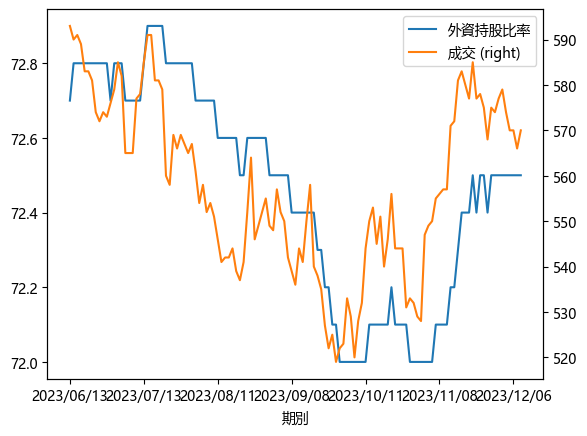

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft Yahei'
ax = df.sort_values('期別').plot(x = '期別', y = '外資持股比率')
df.sort_values('期別').plot(ax = ax, x = '期別', y = '成交', secondary_y = True)

# Stock AI

In [53]:
import requests
import pandas as pd
import json
import datetime as dt

url ='https://stock-ai.com/eomDataQuery'
payload = {
    'a': 'c',
    'showType': 'Value',
    'symbolCode': 'twIndexScore',
    'startYear': 2013,
    'startMonth': 10,
    'endYear': 2023,
    'endMonth': 10,
    'token': '83222f21ed5eb5f03942eb03dd38cb79f78de460d11ab2efa791041f78dfe699'
}

cookies = {
    'PHPSESSID':'kb6rh6pgja3qnoj9mnntu34eql' #PHP, JSP, STS, ASP, STD
}
# cookies有時效性
res = requests.post(url, data = payload, cookies = cookies)
jd = json.loads(res.text)
df = pd.DataFrame(jd['rows'])
df['sDate'] = df['sDate'].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
df

,sDate,sPrice
0,2013-10-01,21
1,2013-11-01,21
2,2013-12-01,24
3,2014-01-01,22
4,2014-02-01,25
...,...,...
116,2023-06-01,13
117,2023-07-01,15
118,2023-08-01,15
119,2023-09-01,17


In [42]:
res.text

'{"sUnit":"分","vUnit":"(分)","sName":"台灣景氣對策信號分數","vName":"[台灣] 台灣景氣對策信號分數","eName":"Taiwan Monitoring indicators","rType":"m","calcType":"0","ip":"162.158.118.129","status":"ok","rows":[{"sDate":"2020-10-01","sPrice":28},{"sDate":"2020-11-01","sPrice":30},{"sDate":"2020-12-01","sPrice":34},{"sDate":"2021-01-01","sPrice":37},{"sDate":"2021-02-01","sPrice":40},{"sDate":"2021-03-01","sPrice":40},{"sDate":"2021-04-01","sPrice":41},{"sDate":"2021-05-01","sPrice":41},{"sDate":"2021-06-01","sPrice":40},{"sDate":"2021-07-01","sPrice":38},{"sDate":"2021-08-01","sPrice":39},{"sDate":"2021-09-01","sPrice":38},{"sDate":"2021-10-01","sPrice":39},{"sDate":"2021-11-01","sPrice":37},{"sDate":"2021-12-01","sPrice":38},{"sDate":"2022-01-01","sPrice":36},{"sDate":"2022-02-01","sPrice":34},{"sDate":"2022-03-01","sPrice":31},{"sDate":"2022-04-01","sPrice":28},{"sDate":"2022-05-01","sPrice":28},{"sDate":"2022-06-01","sPrice":27},{"sDate":"2022-07-01","sPrice":24},{"sDate":"2022-08-01","sPrice":23},{"sDate":

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sDate   37 non-null     datetime64[ns]
 1   sPrice  37 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 720.0 bytes


<Axes: xlabel='sDate'>

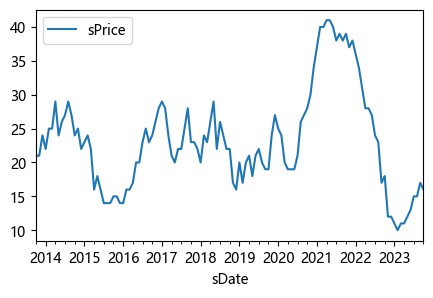

In [54]:
df.plot(x = 'sDate', y = 'sPrice', figsize = (5, 3))

### 處理token

因為token會改變，有可能導致抓不到資料

補:token跟cookie是連體嬰，有一個掛，另一個會跟著掛

### 正規表示法
https://regex101.com/

https://atedev.wordpress.com/2007/11/23/%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%A4%BA%E5%BC%8F-regular-expression/

In [63]:
import requests
import re

url ='https://stock-ai.com/eom-1-twIndexScore.php'
rs = requests.session()
res = requests.get(url)
m = re.findall("token = '(\w+)'", res.text)
m

['510ebe78cd374806fb66f4bc9710254ad22d04349535e00f710a66d39534b9a3']

In [65]:
import requests
import pandas as pd
import json
import datetime as dt
import re

url ='https://stock-ai.com/eom-1-twIndexScore.php'
rs = requests.session() #模仿瀏覽器區域，這會生成新cookie
res = rs.get(url)
m = re.findall("token = '(\w+)'", res.text)

url ='https://stock-ai.com/eomDataQuery'
payload = {
    'a': 'c',
    'showType': 'Value',
    'symbolCode': 'twIndexScore',
    'startYear': 2013,
    'startMonth': 10,
    'endYear': 2023,
    'endMonth': 10,
    'token': m[0]
}


res = rs.post(url, data = payload)
jd = json.loads(res.text)
df = pd.DataFrame(jd['rows'])
df['sDate'] = df['sDate'].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
df

,sDate,sPrice
0,2013-10-01,21
1,2013-11-01,21
2,2013-12-01,24
3,2014-01-01,22
4,2014-02-01,25
...,...,...
116,2023-06-01,13
117,2023-07-01,15
118,2023-08-01,15
119,2023-09-01,17


In [66]:
res.headers

{'Date': 'Sun, 10 Dec 2023 05:11:00 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-powered-by': 'PHP/7.4.33', 'p3p': 'CP="IDC DSP COR ADM DEVi TAIi PSA PSD IVAi IVDi CONi HIS OUR IND CNT"', 'expires': 'Thu, 19 Nov 1981 08:52:00 GMT', 'Cache-Control': 'no-store, no-cache, must-revalidate, no-cache, private', 'pragma': 'no-cache', 'strict-transport-security': 'max-age=31536000; includeSubdomains; preload', 'x-content-type-options': 'nosniff, nosniff', 'set-cookie': 'HttpOnly, Secure', 'x-frame-options': 'SAMEORIGIN', 'x-xss-protection': '1; mode=block', 'access-control-allow-origin': 'https://stock-ai.com', 'access-control-allow-methods': 'DELETE, OPTIONS', 'access-control-allow-headers': 'X-Custom-Software, X-My-Custom', 'access-control-expose-headers': 'Origin', 'access-control-max-age': '3600', 'access-control-allow-credentials': 'true', 'CF-Cache-Status': 'DYNAMIC', 'Report-To': '{"endpoints"

In [71]:
import requests
import pandas as pd

data = []
url = 'https://isin.twse.com.tw/isin/class_main.jsp?market=1&issuetype=I' #上市ETF
res = requests.get(url)
df = pd.read_html(res.text, header = [0])
data.append(df[0])

url = 'https://isin.twse.com.tw/isin/class_main.jsp?market=2&issuetype=3' #上櫃ETF
res = requests.get(url)
df = pd.read_html(res.text, header = [0])
data.append(df[0])

df = pd.concat(data, ignore_index = True)
df

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_14280\936520482.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(res.text, header = [0])
C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_14280\936520482.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(res.text, header = [0])


,頁面編號,國際證券編碼,有價證券代號,有價證券名稱,市場別,有價證券別,產業別,公開發行/上市(櫃)/發行日,CFICode,備註
0,1,TW0000050004,0050,元大台灣50,上市,ETF,NaN,2003/06/30,CEOGEU,NaN
1,2,TW0000051002,0051,元大中型100,上市,ETF,NaN,2006/08/31,CEOGEU,NaN
2,3,TW0000052000,0052,富邦科技,上市,ETF,NaN,2006/09/12,CEOGEU,NaN
3,4,TW0000053008,0053,元大電子,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
4,5,TW0000055003,0055,元大MSCI金融,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
...,...,...,...,...,...,...,...,...,...,...
242,85,TW00000890B3,00890B,凱基ESG BBB 債 15+,上櫃,ETF,NaN,2021/05/10,CEOIBU,NaN
243,86,TW0000092808,00928,中信上櫃ESG 30,上櫃,ETF,NaN,2023/05/24,CEOIEU,NaN
244,87,TW00000931B5,00931B,統一美債20年,上櫃,ETF,NaN,2023/08/07,CEOIBU,NaN
245,88,TW00000933B1,00933B,國泰10Y+金融債,上櫃,ETF,NaN,2023/10/19,CEOJBU,NaN


In [73]:
df[df['有價證券名稱'].str.contains('元大')]

,頁面編號,國際證券編碼,有價證券代號,有價證券名稱,市場別,有價證券別,產業別,公開發行/上市(櫃)/發行日,CFICode,備註
0,1,TW0000050004,0050,元大台灣50,上市,ETF,NaN,2003/06/30,CEOGEU,NaN
1,2,TW0000051002,0051,元大中型100,上市,ETF,NaN,2006/08/31,CEOGEU,NaN
3,4,TW0000053008,0053,元大電子,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
4,5,TW0000055003,0055,元大MSCI金融,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
5,6,TW0000056001,0056,元大高股息,上市,ETF,NaN,2007/12/26,CEOGEU,NaN
7,8,TW0000061001,0061,元大寶滬深,上市,ETF,NaN,2009/08/17,CEOGEU,NaN
8,9,TW0000062033,006203,元大MSCI台灣,上市,ETF,NaN,2011/05/12,CEOGEU,NaN
11,12,TW0000062066,006206,元大上證50,上市,ETF,NaN,2012/05/11,CEOGEU,NaN
15,16,TW00000631L0,00631L,元大台灣50正2,上市,ETF,NaN,2014/10/31,CEOGDU,NaN
16,17,TW00000632R5,00632R,元大台灣50反1,上市,ETF,NaN,2014/10/31,CEOGDU,NaN


In [75]:
df1 = df[df['有價證券名稱'].str.contains('元大')].copy() #記得要copy，不然原資料也會被修改
df1

,頁面編號,國際證券編碼,有價證券代號,有價證券名稱,市場別,有價證券別,產業別,公開發行/上市(櫃)/發行日,CFICode,備註
0,1,TW0000050004,0050,元大台灣50,上市,ETF,NaN,2003/06/30,CEOGEU,NaN
1,2,TW0000051002,0051,元大中型100,上市,ETF,NaN,2006/08/31,CEOGEU,NaN
3,4,TW0000053008,0053,元大電子,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
4,5,TW0000055003,0055,元大MSCI金融,上市,ETF,NaN,2007/07/16,CEOGEU,NaN
5,6,TW0000056001,0056,元大高股息,上市,ETF,NaN,2007/12/26,CEOGEU,NaN
7,8,TW0000061001,0061,元大寶滬深,上市,ETF,NaN,2009/08/17,CEOGEU,NaN
8,9,TW0000062033,006203,元大MSCI台灣,上市,ETF,NaN,2011/05/12,CEOGEU,NaN
11,12,TW0000062066,006206,元大上證50,上市,ETF,NaN,2012/05/11,CEOGEU,NaN
15,16,TW00000631L0,00631L,元大台灣50正2,上市,ETF,NaN,2014/10/31,CEOGDU,NaN
16,17,TW00000632R5,00632R,元大台灣50反1,上市,ETF,NaN,2014/10/31,CEOGDU,NaN


In [77]:
import numpy as np
stockid = np.where(df1['市場別'] == '上市', df1['有價證券代號'] + '.tw', df1['有價證券代號'] + '.two')
stockid

array(['0050.tw', '0051.tw', '0053.tw', '0055.tw', '0056.tw', '0061.tw',
       '006203.tw', '006206.tw', '00631L.tw', '00632R.tw', '00635U.tw',
       '00637L.tw', '00638R.tw', '00642U.tw', '00646.tw', '00647L.tw',
       '00648R.tw', '00660.tw', '00661.tw', '00673R.tw', '00674R.tw',
       '00680L.tw', '00681R.tw', '00682U.tw', '00683L.tw', '00684R.tw',
       '00706L.tw', '00707R.tw', '00708L.tw', '00713.tw', '00738U.tw',
       '00739.tw', '00762.tw', '00771.tw', '00850.tw', '00861.tw',
       '00876.tw', '006201.two', '00679B.two', '00697B.two', '00719B.two',
       '00720B.two', '00721B.two', '00751B.two', '00786B.two',
       '00787B.two', '00788B.two', '00870B.two'], dtype=object)

In [78]:
from pandas_datareader import data as pdr
import yfinance as yf

抓一檔資料

In [79]:
yf.pdr_override()
df = pdr.get_data_yahoo('2330.tw', start = '2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,312.051605,31754120
2020-01-03,344.0,345.0,335.5,339.5,312.511780,41811268
2020-01-06,333.0,334.5,332.0,332.0,305.608002,45343057
2020-01-07,332.5,333.0,326.5,329.5,303.306732,50879181
2020-01-08,325.0,333.0,325.0,329.5,303.306732,37567748
...,...,...,...,...,...,...
2023-12-04,582.0,582.0,571.0,574.0,574.000000,26847171
2023-12-05,571.0,572.0,567.0,570.0,570.000000,22229723
2023-12-06,568.0,575.0,568.0,570.0,570.000000,21518089


In [81]:
抓多檔資料

NameError: name '抓多檔資料' is not defined

In [80]:
yf.pdr_override()
df = pdr.get_data_yahoo(list(stockid), start = '2020-01-01')
df

[*********************100%***********************]  48 of 48 completed


Adj Close                                                         \
               0050.TW    0051.TW    0053.TW    0055.TW    0056.TW    0061.TW   
Date                                                                            
2020-01-02   86.284386  30.926632  38.359959  16.687614  22.418119  18.770000   
2020-01-03   86.284386  30.795769  38.252155  16.696392  22.487478  18.850000   
2020-01-06   85.179863  30.621284  37.767040  16.608652  22.317934  18.910000   
2020-01-07   84.914780  30.289780  37.461597  16.599880  22.109859  18.900000   
2020-01-08   84.517151  30.263605  37.380749  16.512140  21.963436  18.760000   
...                ...        ...        ...        ...        ...        ...   
2023-12-04  131.300003  70.699997  68.849998  23.840000  35.189999  16.639999   
2023-12-05  130.350006  70.150002  68.300003  23.670000  35.049999  16.600000   
2023-12-06  130.800003  70.800003  69.000000  23.860001  35.310001  16.400000   
2023-12-07  130.000000  70.550003  68.699997  23.700001  35.250000  16.350000   
2023-12-08  131.050003  70.900002  69.199997  23.770000  35.419998  16.309999   

                                                         ...     Volume  \
           006201.TWO  006203.TW  006206.TW   00631L.TW  ... 00751B.TWO   
Date                                                     ...              
2020-01-02  13.211445  40.402271  33.810001   54.400002  ...     359000   
2020-01-03  13.119444  40.660690  33.720001   54.200001  ...     216548   
2020-01-06  12.880239  40.277519  33.730000   53.150002  ...     292000   
2020-01-07  12.751436  40.277519  33.660000   52.400002  ...     391000   
2020-01-08  12.668635  39.858704  33.439999   51.900002  ...     314000   
...               ...        ...        ...         ...  ...        ...   
2023-12-04  19.580000  63.900002  27.150000  143.699997  ...   21024000   
2023-12-05  19.490000  63.349998  26.940001  141.750000  ...   20764000   
2023-12-06  19.549999  63.650002  26.620001  143.000000  ...   23458000   
2023-12-07  19.520000  63.299999  26.450001  141.300003  ...   26361000   
2023-12-08  19.650000  63.700001  26.340000  143.050003  ...   21199000   

                                                                        \
           00762.TW 00771.TW 00786B.TWO 00787B.TWO 00788B.TWO 00850.TW   
Date                                                                     
2020-01-02   214000    57001      17000     185000      48000  2897663   
2020-01-03   604000    79000      17000     232000     290000  4865259   
2020-01-06   272174   153000     215000     183000      67000  7000923   
2020-01-07   254000   152000     149000     186000     253000  6047935   
2020-01-08   274000    47100     149000     186000     253000  4240796   
...             ...      ...        ...        ...        ...      ...   
2023-12-04   119233    48001    1336000    1072000    1038000  2464774   
2023-12-05    43795    28143     657000     645000     908000  2841129   
2023-12-06   160516    21333     848000     635000     800000  1992940   
2023-12-07   122300    75000     706000     763000     892000  2265161   
2023-12-08    67103    23000     662000     968000     862000  1813758   

                                           
            00861.TW 00870B.TWO  00876.TW  
Date                                       
2020-01-02   8542601        0.0       NaN  
2020-01-03  17075718        0.0       NaN  
2020-01-06  10350936        0.0       NaN  
2020-01-07   9108651        0.0       NaN  
2020-01-08  11693200        0.0       NaN  
...              ...        ...       ...  
2023-12-04    381986   180000.0  245454.0  
2023-12-05     30590    12000.0  152486.0  
2023-12-06    235110   154000.0  674090.0  
2023-12-07     62172    35000.0  725050.0  
2023-12-08     52069     4000.0  534129.0  

[958 rows x 288 columns]

In [82]:
df['Close'] # 抓收盤價

,0050.TW,0051.TW,0053.TW,0055.TW,0056.TW,0061.TW,006201.TWO,006203.TW,006206.TW,00631L.TW,...,00751B.TWO,00762.TW,00771.TW,00786B.TWO,00787B.TWO,00788B.TWO,00850.TW,00861.TW,00870B.TWO,00876.TW
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,97.650002,35.450001,42.700001,19.020000,29.090000,18.770000,14.360000,45.340000,33.810001,54.400002,...,46.560001,25.740000,20.469999,44.240002,43.669998,42.650002,23.620001,20.420000,39.959702,NaN
2020-01-03,97.650002,35.299999,42.580002,19.030001,29.180000,18.850000,14.260000,45.630001,33.720001,54.200001,...,47.029999,26.059999,20.570000,44.240002,44.099998,43.180000,23.650000,20.450001,39.959202,NaN
2020-01-06,96.400002,35.099998,42.040001,18.930000,28.959999,18.910000,14.000000,45.200001,33.730000,53.150002,...,47.169998,25.920000,20.580000,43.990002,43.950001,43.520000,23.400000,20.299999,39.908001,NaN
2020-01-07,96.099998,34.720001,41.700001,18.920000,28.690001,18.900000,13.860000,45.200001,33.660000,52.400002,...,46.669998,26.030001,20.570000,44.029999,43.919998,43.290001,23.270000,20.340000,39.868000,NaN
2020-01-08,95.650002,34.689999,41.610001,18.820000,28.500000,18.760000,13.770000,44.730000,33.439999,51.900002,...,46.720001,25.910000,20.570000,44.029999,43.919998,43.290001,23.129999,20.209999,39.894100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,131.300003,70.699997,68.849998,23.840000,35.189999,16.639999,19.580000,63.900002,27.150000,143.699997,...,34.279999,47.700001,16.370001,32.750000,34.240002,30.840000,34.029999,33.090000,28.870001,31.360001
2023-12-05,130.350006,70.150002,68.300003,23.670000,35.049999,16.600000,19.490000,63.349998,26.940001,141.750000,...,34.439999,47.450001,16.320000,32.950001,34.459999,31.059999,33.810001,32.919998,29.030001,31.049999
2023-12-06,130.800003,70.800003,69.000000,23.860001,35.310001,16.400000,19.549999,63.650002,26.620001,143.000000,...,34.830002,47.900002,16.350000,33.250000,34.799999,31.430000,33.959999,33.119999,29.360001,31.129999


計算每日報酬

In [91]:
returns = df['Close'].pct_change()
returns

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_14280\3759784403.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = df['Close'].pct_change()


,0050.TW,0051.TW,0053.TW,0055.TW,0056.TW,0061.TW,006201.TWO,006203.TW,006206.TW,00631L.TW,...,00751B.TWO,00762.TW,00771.TW,00786B.TWO,00787B.TWO,00788B.TWO,00850.TW,00861.TW,00870B.TWO,00876.TW
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,-0.004231,-0.002810,0.000526,0.003094,0.004262,-0.006964,0.006396,-0.002662,-0.003676,...,0.010094,0.012432,0.004885,0.000000,0.009847,0.012427,0.001270,0.001469,-0.000013,NaN
2020-01-06,-0.012801,-0.005666,-0.012682,-0.005255,-0.007539,0.003183,-0.018233,-0.009424,0.000297,-0.019373,...,0.002977,-0.005372,0.000486,-0.005651,-0.003401,0.007874,-0.010571,-0.007335,-0.001281,NaN
2020-01-07,-0.003112,-0.010826,-0.008088,-0.000528,-0.009323,-0.000529,-0.010000,0.000000,-0.002075,-0.014111,...,-0.010600,0.004244,-0.000486,0.000909,-0.000683,-0.005285,-0.005556,0.001970,-0.001002,NaN
2020-01-08,-0.004683,-0.000864,-0.002158,-0.005285,-0.006623,-0.007407,-0.006493,-0.010398,-0.006536,-0.009542,...,0.001071,-0.004610,0.000000,0.000000,0.000000,0.000000,-0.006016,-0.006391,0.000655,NaN
2020-01-09,0.013591,0.007495,0.013699,0.001594,0.007018,0.006930,0.009441,0.010508,0.004187,0.028902,...,-0.009632,0.018912,0.000972,-0.007495,-0.005920,-0.011781,0.011673,0.008906,-0.004492,NaN
2020-01-10,0.003610,0.006009,0.001660,0.002122,-0.000348,0.001059,-0.001439,0.001549,-0.000893,0.005618,...,0.001945,0.018182,-0.000486,0.000000,0.000916,0.000701,0.002137,0.007357,0.002158,NaN
2020-01-13,0.007194,0.012799,0.007811,0.014823,0.005228,0.007403,0.012248,0.008836,0.007452,0.015829,...,0.004745,-0.003720,0.000486,0.004577,0.003661,0.000701,0.007249,0.006816,-0.001141,NaN
2020-01-14,0.006122,0.005336,0.007750,0.002087,0.006241,0.009449,0.010676,0.008102,0.007692,0.010999,...,-0.003006,0.007468,0.000486,-0.004784,-0.005244,0.000000,0.004657,0.008221,0.000096,NaN


In [85]:
pd.set_option('display.max_rows', 1000) #展開表格

In [89]:
pd.set_option('display.max_rows', None) #取消展開

In [96]:
data = []
returns = df['Close'].pct_change()
ret = (1 + returns) # 本利和
for col in ret.columns:
    ret0 = ret[col]
    all_ret = ret0.prod() ** (252 / ret0.count()) - 1  #年化報酬
    all_risk = (ret0 - 1).std() * np.sqrt(252) #年化風險
    all_sharpe = all_ret / all_risk
    data.append({'代碼':col, '年化報酬':all_ret, '年化風險':all_risk, '夏普比率':all_sharpe})

df1 = pd.DataFrame(data)
df1

,代碼,年化報酬,年化風險,夏普比率
0,0050.TW,0.080546,0.200160,0.402409
1,0051.TW,0.200240,0.191955,1.043164
2,0053.TW,0.135568,0.216247,0.626911
3,0055.TW,0.060461,0.167204,0.361599
4,0056.TW,0.053211,0.162397,0.327660
5,0061.TW,-0.036316,0.205633,-0.176607
6,006201.TWO,0.086092,0.253919,0.339054
7,006203.TW,0.093658,0.198546,0.471721
8,006206.TW,-0.063629,0.208291,-0.305481
9,00631L.TW,0.289931,0.390701,0.742078


C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_14280\1464124007.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(row[0], (row[2]+0.005,row[1]))


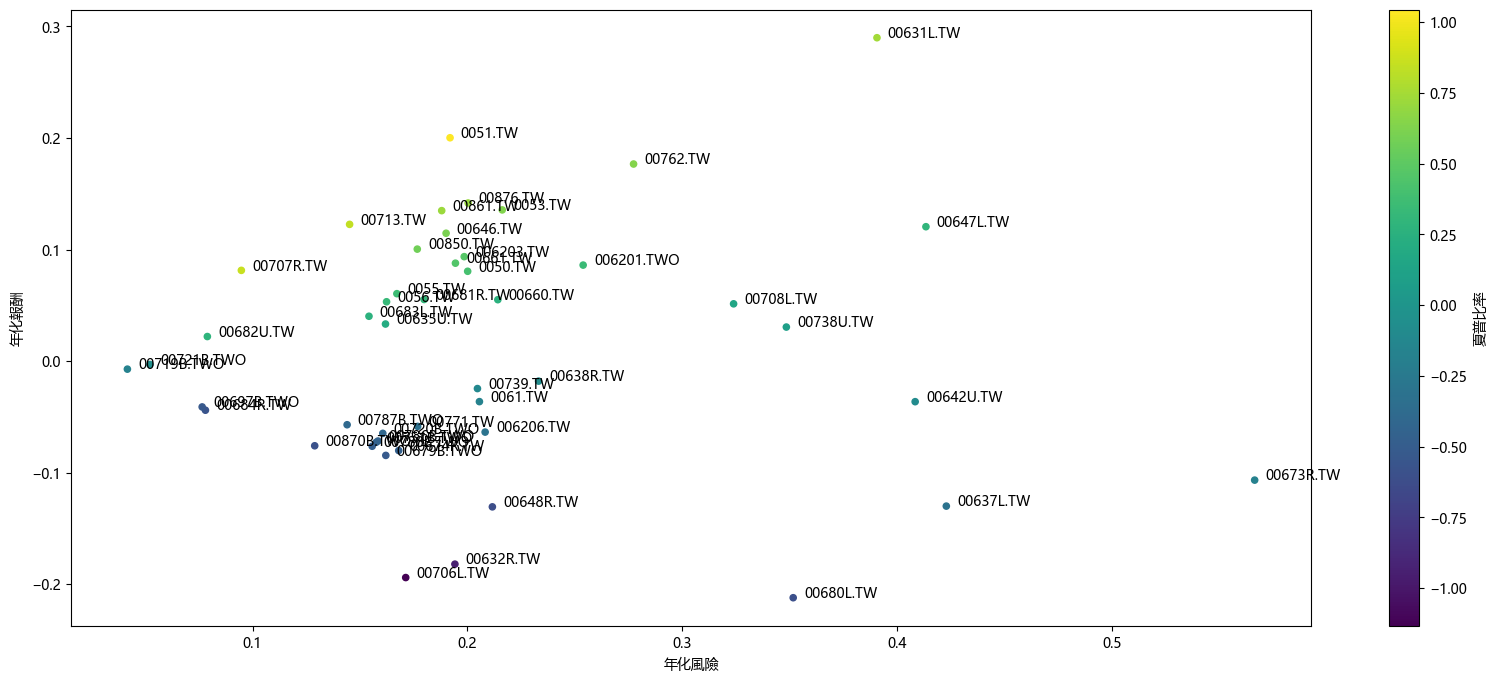

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft Yahei'
df1.plot.scatter(x = '年化風險',
                 y = '年化報酬', 
                 c = '夏普比率',
                figsize = (20, 8))

for idx, row in df1.iterrows():
    plt.annotate(row[0], (row[2]+0.005,row[1]))

In [103]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('2330.tw', start = '2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,312.051544,31754120
2020-01-03,344.0,345.0,335.5,339.5,312.511871,41811268
2020-01-06,333.0,334.5,332.0,332.0,305.608063,45343057
2020-01-07,332.5,333.0,326.5,329.5,303.306702,50879181
2020-01-08,325.0,333.0,325.0,329.5,303.306702,37567748
2020-01-09,335.0,337.5,333.5,337.5,310.670746,31481504
2020-01-10,340.5,341.0,336.0,339.5,312.511871,27032115
2020-01-13,342.0,342.0,339.0,341.5,314.352783,30663332
2020-01-14,345.5,346.0,344.5,346.0,318.495087,30223993


In [104]:
df['Close'].tail(1) #最後一天的資料

Date
2023-12-08    570.0
Name: Close, dtype: float64

In [105]:
(df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]

0.6814159292035398

In [111]:
returns = df['Close'].pct_change()
(1+returns).prod()-1

0.6814159292035347

In [ ]:
(1+returns) #本利和

In [112]:
(1+returns).cumprod() #每日本金在投入投資中的獲利

Date
2020-01-02         NaN
2020-01-03    1.001475
2020-01-06    0.979351
2020-01-07    0.971976
2020-01-08    0.971976
2020-01-09    0.995575
2020-01-10    1.001475
2020-01-13    1.007375
2020-01-14    1.020649
2020-01-15    1.002950
2020-01-16    0.986726
2020-01-17    0.982301
2020-01-20    0.982301
2020-01-30    0.933628
2020-01-31    0.943953
2020-02-03    0.929204
2020-02-04    0.958702
2020-02-05    0.966077
2020-02-06    0.980826
2020-02-07    0.967552
2020-02-10    0.966077
2020-02-11    0.977876
2020-02-12    0.988201
2020-02-13    0.988201
2020-02-14    0.988201
2020-02-17    0.977876
2020-02-18    0.949853
2020-02-19    0.963127
2020-02-20    0.960177
2020-02-21    0.958702
2020-02-24    0.943953
2020-02-25    0.949853
2020-02-26    0.939528
2020-02-27    0.932153
2020-03-02    0.917404
2020-03-03    0.936578
2020-03-04    0.945428
2020-03-05    0.952802
2020-03-06    0.929204
2020-03-09    0.901180
2020-03-10    0.905605
2020-03-11    0.890855
2020-03-12    0.867257
2020-0

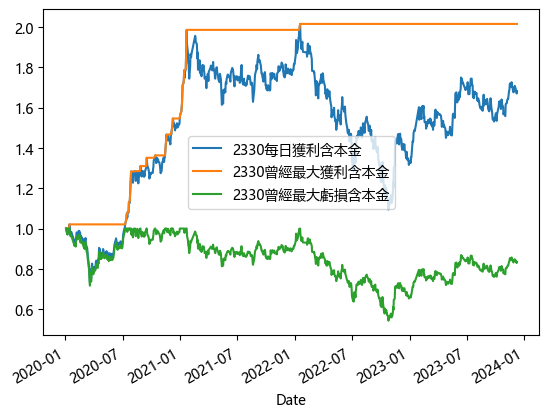

In [121]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft Yahei'

(1+returns).cumprod().plot(label = '2330每日獲利含本金')
(1+returns).cumprod().cummax().plot(label = '2330曾經最大獲利含本金')
((1+returns).cumprod() / (1+returns).cumprod().cummax()).plot(label = '2330曾經最大虧損含本金')
plt.legend()

In [120]:
(1+returns).cumprod() / (1+returns).cumprod().cummax()

Date
2020-01-02         NaN
2020-01-03    1.000000
2020-01-06    0.977909
2020-01-07    0.970545
2020-01-08    0.970545
2020-01-09    0.994109
2020-01-10    1.000000
2020-01-13    1.000000
2020-01-14    1.000000
2020-01-15    0.982659
2020-01-16    0.966763
2020-01-17    0.962428
2020-01-20    0.962428
2020-01-30    0.914740
2020-01-31    0.924855
2020-02-03    0.910405
2020-02-04    0.939306
2020-02-05    0.946532
2020-02-06    0.960983
2020-02-07    0.947977
2020-02-10    0.946532
2020-02-11    0.958092
2020-02-12    0.968208
2020-02-13    0.968208
2020-02-14    0.968208
2020-02-17    0.958092
2020-02-18    0.930636
2020-02-19    0.943642
2020-02-20    0.940751
2020-02-21    0.939306
2020-02-24    0.924855
2020-02-25    0.930636
2020-02-26    0.920520
2020-02-27    0.913295
2020-03-02    0.898844
2020-03-03    0.917630
2020-03-04    0.926301
2020-03-05    0.933526
2020-03-06    0.910405
2020-03-09    0.882948
2020-03-10    0.887283
2020-03-11    0.872832
2020-03-12    0.849711
2020-0

In [126]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('2330.tw', start = '2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,312.051575,31754120
2020-01-03,344.0,345.0,335.5,339.5,312.511841,41811268
2020-01-06,333.0,334.5,332.0,332.0,305.608032,45343057
2020-01-07,332.5,333.0,326.5,329.5,303.306763,50879181
2020-01-08,325.0,333.0,325.0,329.5,303.306763,37567748
2020-01-09,335.0,337.5,333.5,337.5,310.670776,31481504
2020-01-10,340.5,341.0,336.0,339.5,312.511841,27032115
2020-01-13,342.0,342.0,339.0,341.5,314.352905,30663332
2020-01-14,345.5,346.0,344.5,346.0,318.495148,30223993


In [127]:
df['10MA'] = df['Close'].rolling(10).mean()
df['20MA'] = df['Close'].rolling(10).mean()
df

,Open,High,Low,Close,Adj Close,Volume,10MA,20MA
Date,,,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,312.051575,31754120,NaN,NaN
2020-01-03,344.0,345.0,335.5,339.5,312.511841,41811268,NaN,NaN
2020-01-06,333.0,334.5,332.0,332.0,305.608032,45343057,NaN,NaN
2020-01-07,332.5,333.0,326.5,329.5,303.306763,50879181,NaN,NaN
2020-01-08,325.0,333.0,325.0,329.5,303.306763,37567748,NaN,NaN
2020-01-09,335.0,337.5,333.5,337.5,310.670776,31481504,NaN,NaN
2020-01-10,340.5,341.0,336.0,339.5,312.511841,27032115,NaN,NaN
2020-01-13,342.0,342.0,339.0,341.5,314.352905,30663332,NaN,NaN
2020-01-14,345.5,346.0,344.5,346.0,318.495148,30223993,NaN,NaN


In [128]:
buy = (df['Close'].shift(2) < df['20MA'].shift(2)) & (df['20MA'].shift(1) < df['Close'].shift(1))
sell = (df['Close'].shift(2) > df['20MA'].shift(2)) & (df['20MA'].shift(1) > df['Close'].shift(1))
buy
sell

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
2020-01-09    False
2020-01-10    False
2020-01-13    False
2020-01-14    False
2020-01-15    False
2020-01-16    False
2020-01-17     True
2020-01-20    False
2020-01-30    False
2020-01-31    False
2020-02-03    False
2020-02-04    False
2020-02-05    False
2020-02-06    False
2020-02-07    False
2020-02-10    False
2020-02-11    False
2020-02-12    False
2020-02-13    False
2020-02-14    False
2020-02-17    False
2020-02-18    False
2020-02-19     True
2020-02-20    False
2020-02-21    False
2020-02-24    False
2020-02-25    False
2020-02-26    False
2020-02-27    False
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
2020-03-06    False
2020-03-09     True
2020-03-10    False
2020-03-11    False
2020-03-12    False
2020-03-13    False
2020-03-16    False
2020-03-17    False
2020-03-18    False
2020-03-19    False
2020-03-20    False
2020-03-23    F